In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
df=pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [49]:
file=df[['ENGINESIZE']]
file.head()

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5


array([[<AxesSubplot:title={'center':'ENGINESIZE'}>]], dtype=object)

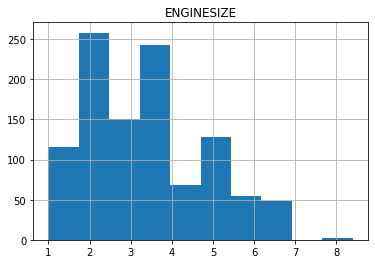

In [50]:
file.hist()

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(file,df.CO2EMISSIONS,test_size=0.2)

In [52]:
x_test

,ENGINESIZE
609,1.6
510,2.4
427,3.5
404,2.0
96,3.0
...,...
466,2.4
327,3.6
842,4.0
838,5.6


In [53]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [54]:
y_hat=model.predict(x_test)
print(y_hat)

[188.02962593 219.09010914 261.79827357 203.55986753 242.38547156
 331.68436081 203.55986753 308.3889984  184.14706552 188.02962593
 296.74131719 320.03667961 261.79827357 203.55986753 242.38547156
 203.55986753 203.55986753 296.74131719 219.09010914 222.97266955
 222.97266955 261.79827357 257.91571317 188.02962593 273.44595478
 184.14706552 269.56339437 195.79474673 180.26450512 195.79474673
 339.44948162 219.09010914 195.79474673 219.09010914 242.38547156
 195.79474673 180.26450512 230.73779035 250.15059236 176.38194472
 339.44948162 230.73779035 203.55986753 242.38547156 261.79827357
 265.68083397 203.55986753 366.62740443 242.38547156 242.38547156
 203.55986753 195.79474673 203.55986753 308.3889984  203.55986753
 180.26450512 188.02962593 195.79474673 203.55986753 261.79827357
 261.79827357 203.55986753 219.09010914 180.26450512 203.55986753
 184.14706552 222.97266955 312.2715588  195.79474673 265.68083397
 195.79474673 331.68436081 188.02962593 222.97266955 203.55986753
 222.97266

In [55]:
model.score(x_test,y_test)

0.794069500476513

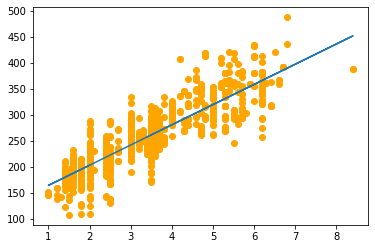

In [56]:
plt.scatter(file.ENGINESIZE,df.CO2EMISSIONS,color='orange')
plt.plot(x_train,model.coef_[0]*x_train+model.intercept_)

In [61]:
from sklearn.metrics import r2_score
print('Mean absolute error is',np.mean(np.absolute(y_hat-y_test)))


Mean absolute error is 20.9066112222497


In [62]:
r2_score(y_hat,y_test)

0.7134633283157523